In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
RANDOM_SEED = 666

In [4]:
df = pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Feature Engineering
#Standardization / Normalization

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
X = df[['1stFlrSF']]

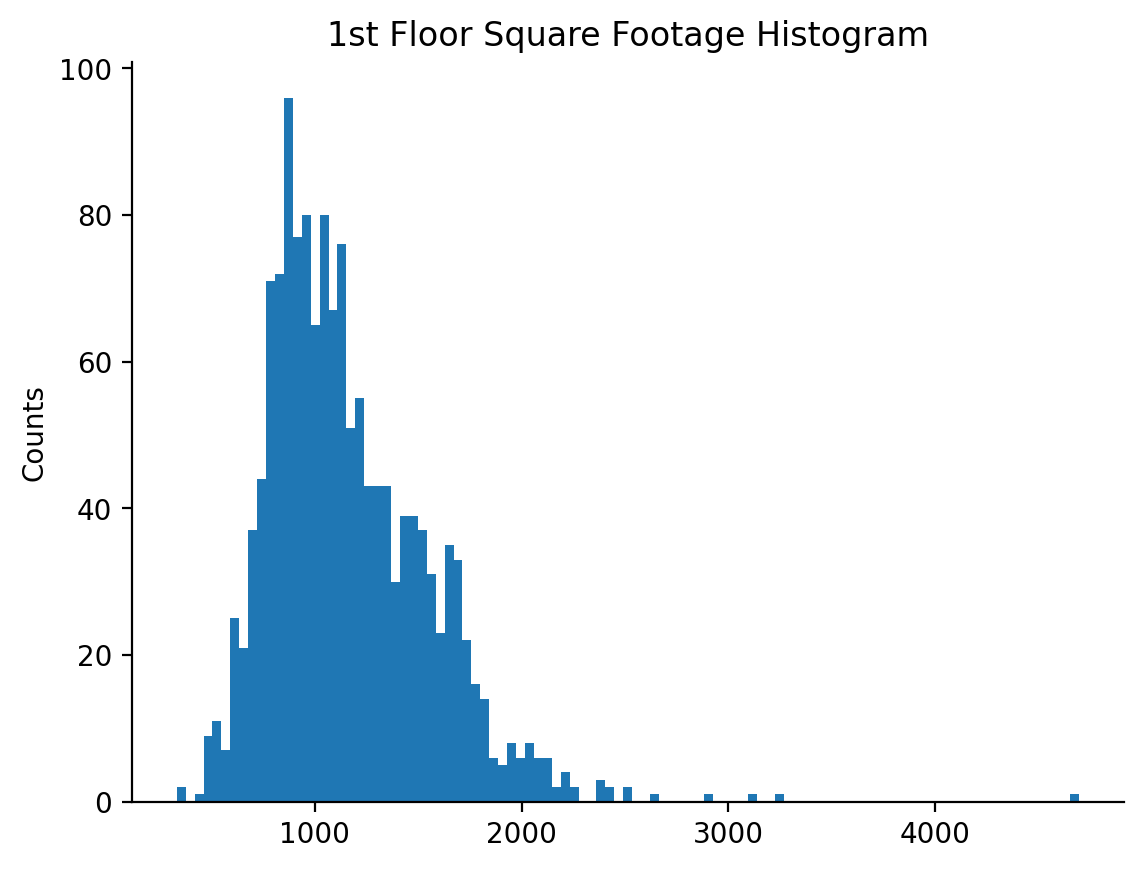

In [7]:
fig, ax = plt.subplots()
ax.hist(X, bins=101)
ax.set_title("1st Floor Square Footage Histogram")
ax.set_ylabel("Counts")
None

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler = scaler.fit(X)

In [10]:
print(f" Mean:{scaler.mean_},variance:{scaler.var_}")

 Mean:[1162.62671233],variance:[149347.71613577]


In [11]:
X_trans = scaler.transform(X)

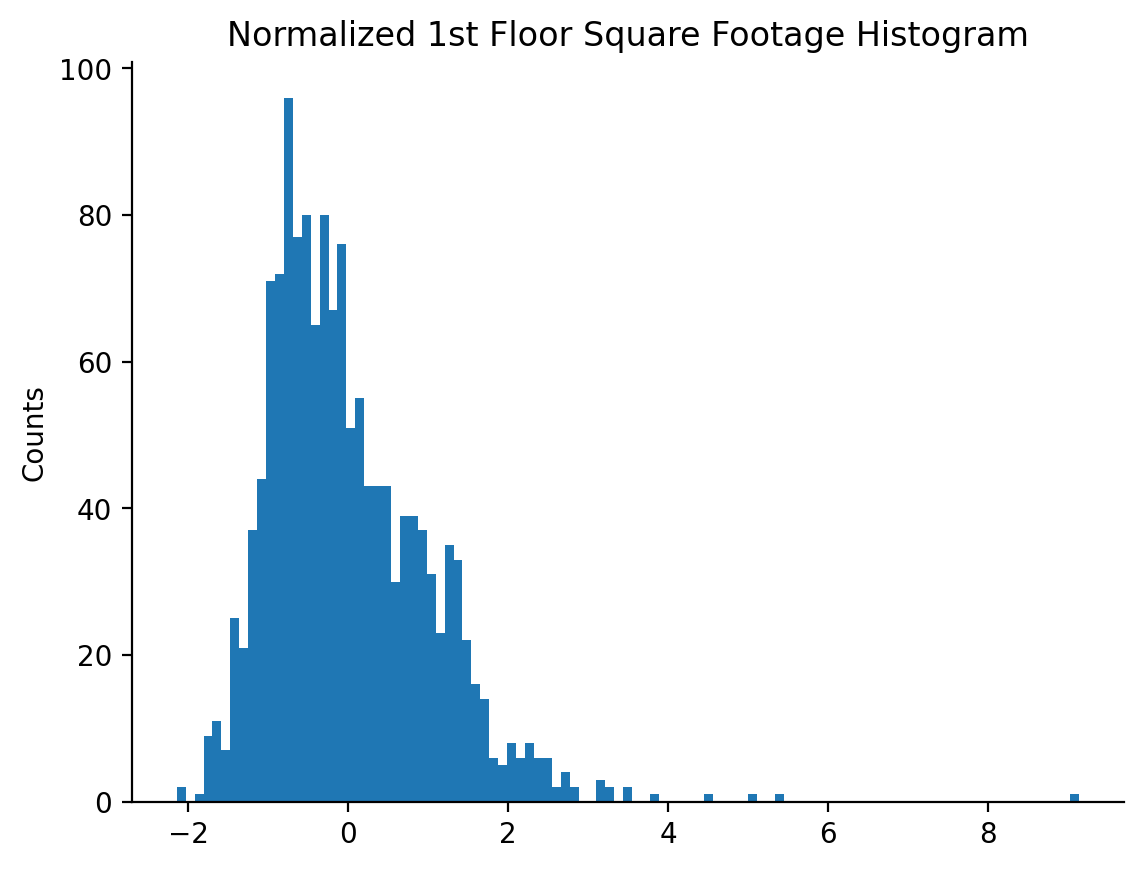

In [12]:
fig, ax = plt.subplots()
ax.hist(X_trans,bins = 101)
ax.set_title("Normalized 1st Floor Square Footage Histogram")
ax.set_ylabel("Counts")
None

# Power Transformer for Gaussian-ifying Data

In [13]:
from sklearn.preprocessing import PowerTransformer

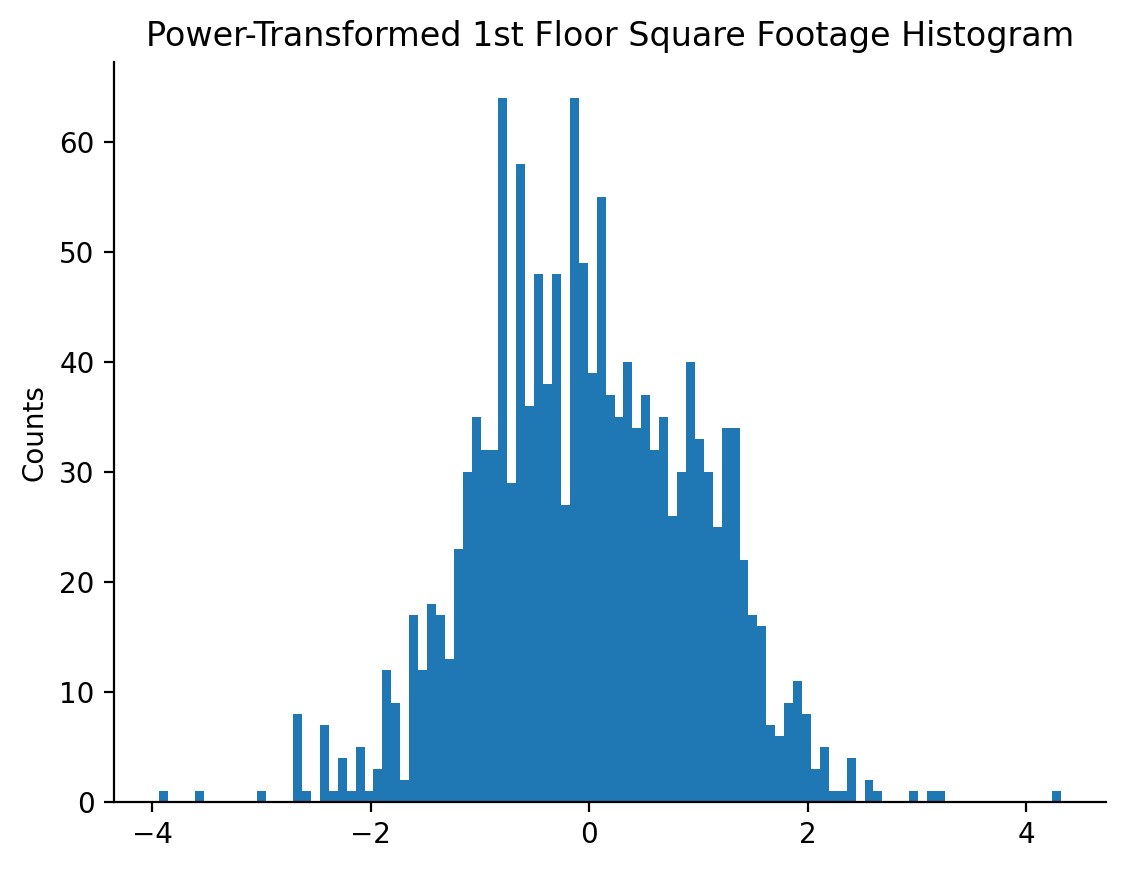

In [15]:
scaler = PowerTransformer()
scaler = scaler.fit(X)
X_trans = scaler.transform(X)
fig, ax = plt.subplots()
ax.hist(X_trans, bins=101)
ax.set_title("Power-Transformed 1st Floor Square Footage Histogram")
ax.set_ylabel("Counts")
None

# String Features

## Ordinal Encoding

### ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [20]:
X = df[["ExterCond"]]
X.head(50)

,ExterCond
0,TA
1,TA
2,TA
3,TA
4,TA
5,TA
6,TA
7,TA
8,TA
9,TA


In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
categories = ["Po", "Fa", "TA", "Gd", "Ex"]
ordinal_encoder = OrdinalEncoder(categories=[categories])

In [23]:
ordinal_encoder = ordinal_encoder.fit(X)

In [24]:
ordinal_encoder.categories_

[array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object)]

In [25]:
X_trans = ordinal_encoder.transform(X)
X_trans

array([[2.],
       [2.],
       [2.],
       ...,
       [3.],
       [2.],
       [2.]])

In [26]:
ordinal_encoder.inverse_transform(X_trans)

array([['TA'],
       ['TA'],
       ['TA'],
       ...,
       ['Gd'],
       ['TA'],
       ['TA']], dtype=object)

## One hot encoding

### Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [27]:
X = df[['Foundation']]
X.head(10)

,Foundation
0,PConc
1,CBlock
2,PConc
3,BrkTil
4,PConc
5,Wood
6,PConc
7,CBlock
8,BrkTil
9,BrkTil


In [30]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
one_hot_encoder = OneHotEncoder(categories="auto", sparse_output=False)
X_trans = one_hot_encoder.fit_transform(X)
X_trans

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [33]:
one_hot_encoder.categories_

[array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object)]

In [34]:
one_hot_encoder.inverse_transform(X_trans)

array([['PConc'],
       ['CBlock'],
       ['PConc'],
       ...,
       ['Stone'],
       ['CBlock'],
       ['CBlock']], dtype=object)

In [35]:
pd.get_dummies(X)

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1455,0,0,1,0,0,0
1456,0,1,0,0,0,0
1457,0,0,0,0,1,0
1458,0,1,0,0,0,0


In [37]:
X = df[["Foundation", "SaleCondition", "HouseStyle"]]
X

,Foundation,SaleCondition,HouseStyle
0,PConc,Normal,2Story
1,CBlock,Normal,1Story
2,PConc,Normal,2Story
3,BrkTil,Abnorml,2Story
4,PConc,Normal,2Story
...,...,...,...
1455,PConc,Normal,2Story
1456,CBlock,Normal,1Story
1457,Stone,Normal,2Story
1458,CBlock,Normal,1Story


In [39]:
one_hot_encoder = OneHotEncoder(categories="auto", sparse_output=False)
X_trans = one_hot_encoder.fit_transform(X)
X_trans

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [40]:
one_hot_encoder.categories_

[array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object),
 array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
       dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
        'SFoyer', 'SLvl'], dtype=object)]

In [41]:
one_hot_encoder.inverse_transform(one_hot_encoder.fit_transform(X_trans))

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Model Selection

## Train/test split

In [44]:
print(f"Full Dataset: {len(df)} samples")

Full Dataset: 1460 samples


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
TEST_SIZE = 0.30
RANDOM_SEED = 666
train, test = train_test_split(
    df,
    test_size = TEST_SIZE,
    random_state=RANDOM_SEED
)

In [48]:
print (f"Train Dataset: {len(train):,} samples ({len(train) / len(df):.0%})")

Train Dataset: 1,022 samples (70%)


In [49]:
print (f"Test Dataset: {len(test):,} samples ({len(test) / len(df):.0%})")

Test Dataset: 438 samples (30%)


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
def get_X_y(df):
    target = "SalePrice"
    features = []
    for col in df.columns:
        if col==target:
            continue
        if df[col].dtype in (np.dtype("int64"), np.dtype("float64")):
            features.append(col)
    X = df[features].copy()
    y = df[target].copy()
    return X, y

In [53]:
X_train, y_train = get_X_y(train)

In [54]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
imputer = SimpleImputer()
X_train_trans = imputer.fit_transform(X_train)

In [57]:
model.fit(X_train_trans, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import r2_score

In [60]:
y_train_pred = model.predict(X_train_trans)
r2_train = r2_score(y_train,y_train_pred)
print(f" Training R2 score: {r2_train:.3}")

 Training R2 score: 0.834


In [61]:
X_test, y_test = get_X_y(test)

In [62]:
y_test_pred = model.predict(X_test)

/home/akshayghime/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [63]:
X_test_trans = imputer.transform(X_test)

In [66]:
y_test_pred = model.predict(X_test_trans)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test R^2 = {r2_test:.3}")

Test R^2 = 0.735


# Regularisation

In [67]:
from sklearn.linear_model import Ridge

In [73]:
def fit_and_evaluate_model(model,train,test):
    X_train, y_train = get_X_y(train)
    X_test, y_test = get_X_y(test)
    
    imputer = SimpleImputer()
    
    X_train_trans = imputer.fit_transform(X_train)
    model.fit(X_train_trans, y_train)
    
    y_train_pred = model.predict(X_train_trans)
    y_test_pred = model.predict(imputer.transform(X_test))
    
    return r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

In [74]:
r2_train, r2_test = fit_and_evaluate_model(Ridge(alpha=1000, random_state=RANDOM_SEED),train,test)

In [75]:
print(f"Train R^2 = {r2_train:.3}")
print(f"Test R^2 = {r2_test:.3}")

Train R^2 = 0.812
Test R^2 = 0.715


In [76]:
def fit_and_evaluate_model_with_scaling(model, train, test):
    X_train, y_train = get_X_y(train)
    X_test, y_test = get_X_y(test)

    # Let's also scale the data first!
    scaler = StandardScaler()
    X_train_trans = scaler.fit_transform(X_train)

    imputer = SimpleImputer()
    X_train_trans = imputer.fit_transform(X_train_trans)

    model.fit(X_train_trans, y_train)

    y_train_pred = model.predict(X_train_trans)
    y_test_pred = model.predict(imputer.transform(scaler.transform(X_test)))

    return r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

In [79]:
r2_train, r2_test = fit_and_evaluate_model_with_scaling(
    Ridge(alpha=1_000, random_state=RANDOM_SEED), train, test
)
print(f"Train R^2 = {r2_train:.3}")
print(f"Test R^2 = {r2_test:.3}")

Train R^2 = 0.797
Test R^2 = 0.738


# Cross Validation

In [81]:
from sklearn.model_selection import KFold

In [82]:
splitter = KFold(n_splits=5,shuffle=True, random_state=RANDOM_SEED)

In [84]:
fold = 1
for train_index, val_index in splitter.split(train):
    print(f"Fold {fold}:")
    print(
        f"\tTrain Dataset: {len(train_index):,} samples ({len(train_index) / len(train):.0%})"
    )
    print(
        f"\tVal Dataset: {len(val_index)} samples ({len(val_index) / len(train):.0%})"
    )
    fold += 1

Fold 1:
	Train Dataset: 817 samples (80%)
	Val Dataset: 205 samples (20%)
Fold 2:
	Train Dataset: 817 samples (80%)
	Val Dataset: 205 samples (20%)
Fold 3:
	Train Dataset: 818 samples (80%)
	Val Dataset: 204 samples (20%)
Fold 4:
	Train Dataset: 818 samples (80%)
	Val Dataset: 204 samples (20%)
Fold 5:
	Train Dataset: 818 samples (80%)
	Val Dataset: 204 samples (20%)


In [85]:
print(val_index)

[   2    9   10   16   24   27   28   36   39   45   46   47   52   57
   60   63   69   70   73   77   79   80   83   86   88   91   99  100
  122  125  130  133  136  139  141  142  145  148  151  155  156  157
  169  174  191  194  204  208  217  219  221  222  236  241  245  247
  249  255  260  261  274  276  283  289  292  295  301  304  314  328
  333  334  335  338  339  347  353  361  363  369  373  377  381  383
  392  396  400  403  404  414  427  428  429  432  443  445  446  448
  452  458  463  467  474  488  489  500  505  511  514  525  528  538
  542  544  548  549  554  563  575  582  584  592  596  602  614  615
  619  624  625  638  650  656  659  668  673  676  678  680  687  695
  704  709  714  715  722  724  735  737  774  776  782  786  789  793
  794  795  802  806  807  810  822  826  828  830  837  847  850  852
  854  856  861  862  871  875  882  884  885  887  898  900  904  907
  920  922  923  926  932  947  950  960  964  968  969  970  975  980
  983 

In [86]:
r2_trains = []
r2_vals = []
fold = 1
for train_index, val_index in splitter.split(train):
    r2_train, r2_val = fit_and_evaluate_model_with_scaling(
        Ridge(alpha=1_000, random_state=RANDOM_SEED),
        train.iloc[train_index],
        train.iloc[val_index],
    )
    
    r2_trains.append(r2_train)
    r2_vals.append(r2_val)

    fold += 1

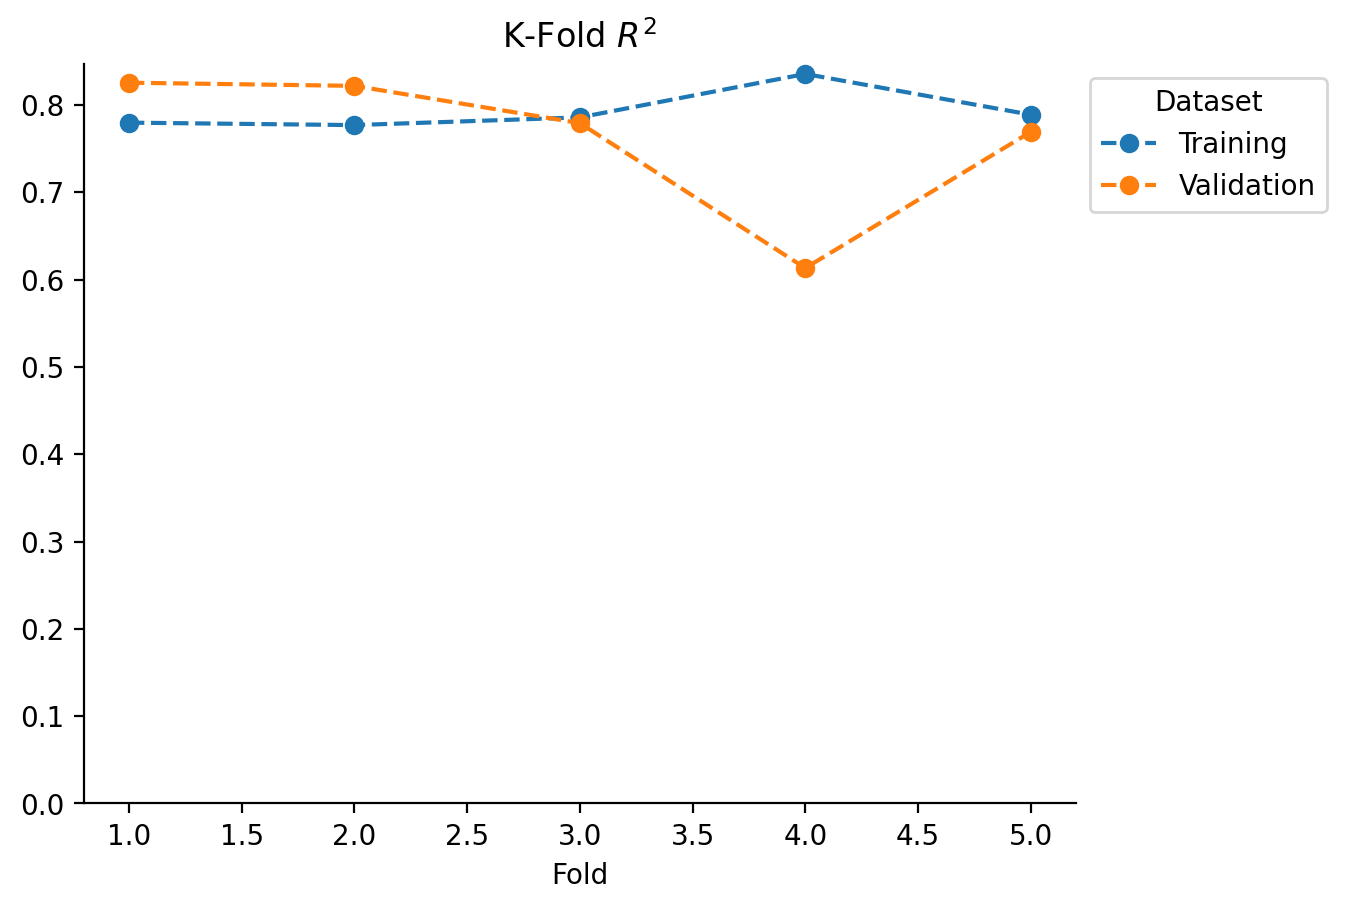

In [91]:
fig, ax = plt.subplots()
ax.plot(range(1, 6), r2_trains, "o--", label="Training")
ax.plot(range(1, 6), r2_vals, "o--", label="Validation")
ax.legend(title="Dataset", bbox_to_anchor=(1, 1))
ax.set_xlabel("Fold")
ax.set_title("K-Fold $R^{2}$")
ax.set_ylim((0, ax.get_ylim()[1]))
None

## Doing a hyper parameter search

In [92]:
alpha_values = np.logspace(-1, 6, 8)
print(alpha_values)

[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


In [93]:
avg_r2_trains = []
avg_r2_vals = []
for alpha in alpha_values:
    r2_trains = []
    r2_vals = []
    fold = 1
    for train_index, val_index in splitter.split(train):
        r2_train, r2_val = fit_and_evaluate_model_with_scaling(
            Ridge(alpha=alpha, random_state=RANDOM_SEED),
            train.iloc[train_index],
            train.iloc[val_index],
        )

        r2_trains.append(r2_train)
        r2_vals.append(r2_val)

        fold += 1
    avg_r2_trains.append(np.mean(r2_trains))
    avg_r2_vals.append(np.mean(r2_vals))

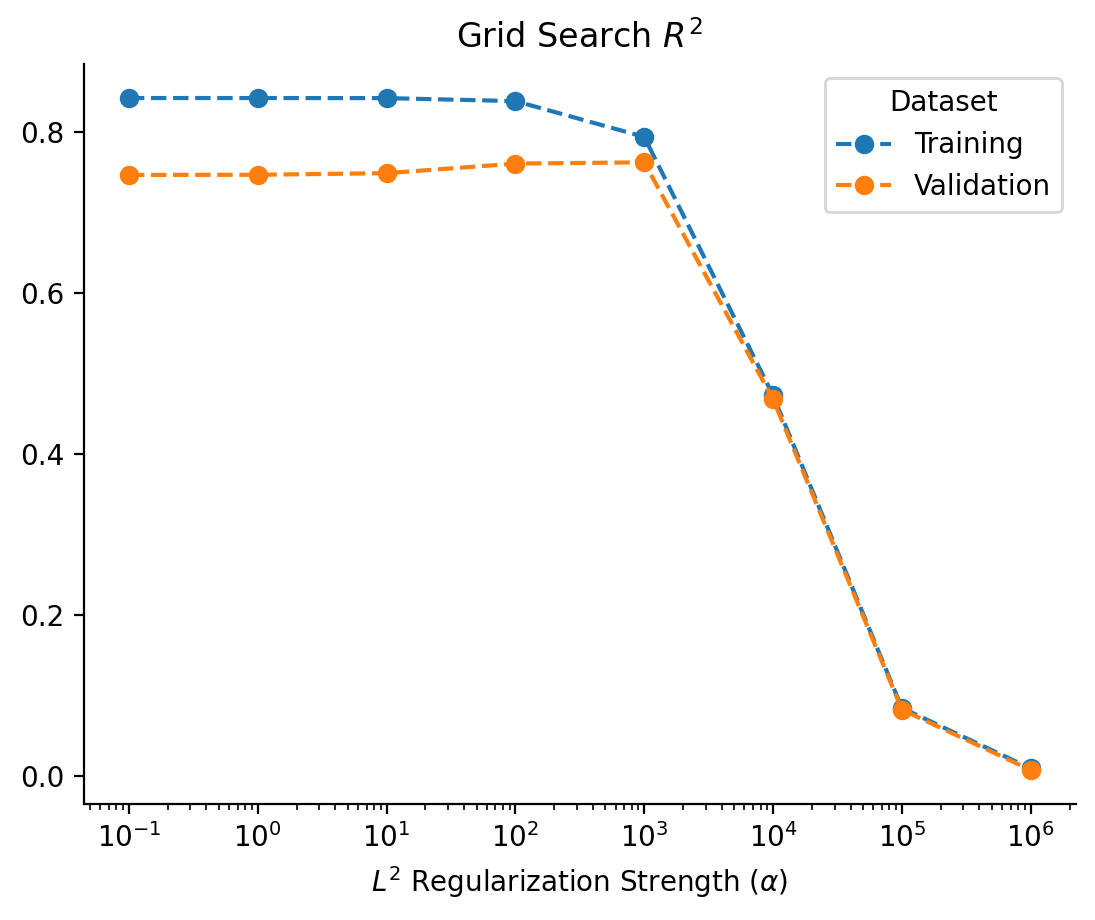

In [94]:
fig, ax = plt.subplots()
ax.plot(alpha_values, avg_r2_trains, "o--", label="Training")
ax.plot(alpha_values, avg_r2_vals, "o--", label="Validation")
ax.legend(title="Dataset", bbox_to_anchor=(1, 1))
ax.set_xlabel("$L^{2}$ Regularization Strength ($\\alpha$)")
ax.set_title("Grid Search $R^{2}$")
ax.semilogx()
None

# Easy to Tie Yourself Up In Knots

### We picked out features in get_X_y()
### To add the scaler, we had to write a new fit_and_evaluate_model() function.
### Have to remember to transform test data in the same order as training data.
### Remember: everything is the model.

# Solutions: Pipelines

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
from sklearn.pipeline import Pipeline

In [99]:
pipeline = Pipeline(
    [("scaler", StandardScaler()),("imputer", SimpleImputer()),("estimator", Ridge())]
)

In [100]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('estimator', Ridge())])

In [101]:
param_grid = {"estimator__alpha": alpha_values}
grid_search = GridSearchCV(
    pipeline,param_grid, cv=5, scoring="r2", return_train_score=True
)

In [102]:
X_train,y_train = get_X_y(train)
X_test, y_test = get_X_y(test)

In [103]:
grid_search = grid_search.fit(X_train, y_train)

In [104]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004981,0.000459,0.002123,0.000043,0.1,{'estimator__alpha': 0.1},0.863938,0.825640,0.826875,0.844283,...,0.729018,0.222768,5,0.825234,0.829824,0.832227,0.830042,0.884471,0.840360,0.022173
1,0.004794,0.000127,0.002227,0.000070,1.0,{'estimator__alpha': 1.0},0.864038,0.825590,0.827022,0.844343,...,0.729269,0.222397,4,0.825233,0.829823,0.832225,0.830041,0.884470,0.840359,0.022173
2,0.005000,0.000128,0.002246,0.000076,10.0,{'estimator__alpha': 10.0},0.864830,0.825098,0.828285,0.844811,...,0.731565,0.218838,3,0.825141,0.829751,0.832125,0.829953,0.884389,0.840272,0.022176
3,0.005302,0.000107,0.002409,0.000078,100.0,{'estimator__alpha': 100.0},0.864635,0.820774,0.831125,0.844237,...,0.744030,0.192883,2,0.821364,0.826396,0.827784,0.826192,0.880689,0.836485,0.022208
4,0.005822,0.000861,0.002425,0.000048,1000.0,{'estimator__alpha': 1000.0},0.817811,0.778905,0.780681,0.810087,...,0.745833,0.103243,1,0.778661,0.781010,0.783713,0.783090,0.836703,0.792636,0.022105
5,0.005614,0.000805,0.002417,0.000016,10000.0,{'estimator__alpha': 10000.0},0.476699,0.440937,0.443558,0.484316,...,0.466277,0.019882,6,0.467712,0.458069,0.471555,0.465191,0.498368,0.472179,0.013814
6,0.005272,0.000019,0.002402,0.000012,100000.0,{'estimator__alpha': 100000.0},0.079521,0.075610,0.077326,0.083590,...,0.081130,0.005007,7,0.084009,0.080788,0.084663,0.082667,0.088538,0.084133,0.002571
7,0.005052,0.000162,0.002310,0.000036,1000000.0,{'estimator__alpha': 1000000.0},0.003027,0.007625,0.007861,0.006347,...,0.005508,0.002230,8,0.009079,0.008705,0.009149,0.008918,0.009550,0.009080,0.000280


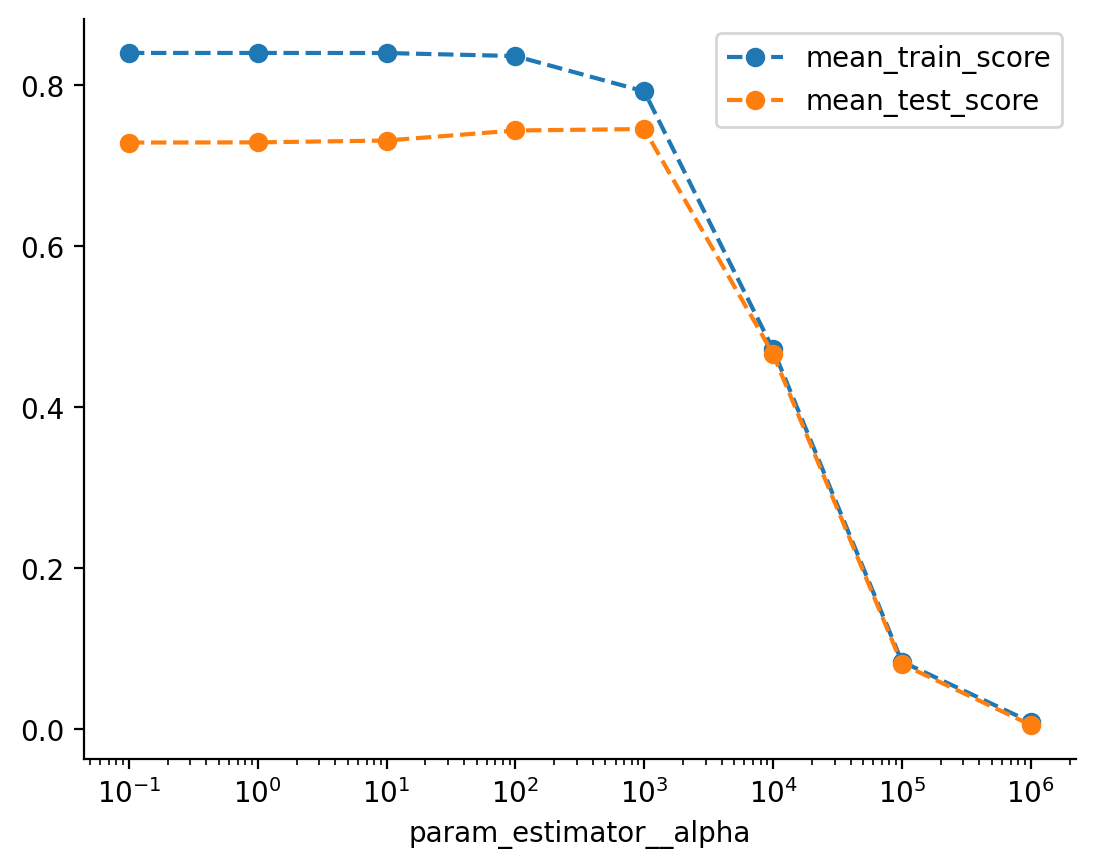

In [105]:
ax = results.set_index("param_estimator__alpha")[
    ["mean_train_score", "mean_test_score"]
].plot(marker="o", linestyle="--")
ax.semilogx()
None